# Classify the cifar10 dataset using artificial neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Downloading Dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 8s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

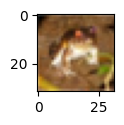

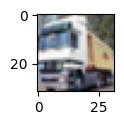

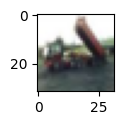

In [ ]:
for i in range(3):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[i])

In [ ]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
classes[y_train[2][0]]

'truck'

**Scaling the Images**

In [ ]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10
)

In [ ]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

# Define a artificial neural network for classify the images

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8103 - accuracy: 0.3565
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6256 - accuracy: 0.4257
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5430 - accuracy: 0.4559
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4833 - accuracy: 0.4787
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4329 - accuracy: 0.4945
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3903 - accuracy: 0.5103
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3513 - accuracy: 0.5270
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3177 - accuracy: 0.5368
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2843 - accuracy: 0.5503
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.25

# Got accuracy of 91 percent on training dataset

In [ ]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 1.5461 - accuracy: 0.5694


[1.5460689067840576, 0.5694000124931335]

In [ ]:
y_predicted=model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [ ]:
classes[np.argmax(y_predicted[50])]

'truck'

In [ ]:
classes[y_test[50][0]]

'truck'